#### Importing Libraries

In [94]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

#### Read Files

In [95]:
oil = pd.read_csv(r"..\Data\01_raw\oil.csv")
holidays = pd.read_csv(r"..\Data\01_raw\holidays_events.csv")
stores = pd.read_csv(r"..\Data\01_raw\stores.csv")
train = pd.read_csv(r"..\Data\01_raw\train.csv")
transactions = pd.read_csv(r"..\Data\01_raw\transactions.csv")

#### Data Profiling

##### 1. Oil data set

In [96]:
oil.shape

(1218, 2)

In [97]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [98]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [99]:
def datadefination(df : pd.core.frame.DataFrame):
    c = pd.DataFrame()
    for i in df.columns:
        if df[i].dtype != "O":
            x = df[i].describe().to_frame().T
            x['missing value count'] = df[i].isnull().sum()
            x['null percentage'] = x['missing value count'] / len(df) * 100
            x['column name'] = i
            c = pd.concat([c, x], ignore_index=True)
    
    cols = ['column name'] + [col for col in c.columns if col != 'column name']
    c = c[cols]

    return c

In [100]:
datadefination(oil)

,column name,count,mean,std,min,25%,50%,75%,max,missing value count,null percentage
0,dcoilwtico,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62,43,3.530378


##### Testing that the missing values are completly random or the data is missing only if there is a holiday.

In [101]:
null = set(oil[oil['dcoilwtico'].isnull() == True]['date'])
holiday_dates = set(holidays['date'])
null.difference(holiday_dates)

{'2013-01-21',
 '2013-02-18',
 '2013-03-29',
 '2013-05-27',
 '2013-07-04',
 '2013-09-02',
 '2013-11-28',
 '2014-01-20',
 '2014-02-17',
 '2014-05-26',
 '2014-09-01',
 '2014-11-27',
 '2015-01-19',
 '2015-05-25',
 '2015-09-07',
 '2015-11-26',
 '2016-01-18',
 '2016-02-15',
 '2016-05-30',
 '2016-07-04',
 '2016-09-05',
 '2016-11-24',
 '2017-01-16',
 '2017-02-20',
 '2017-05-29',
 '2017-07-04'}

we can treat null values in time series using ffill, bfill and also methods like interpolation. 
interpolation is simply like connecting two dots before and after the null values. and it will not work if the data is missing at the start or end of the data. so we can use forward fill or backward fill accordingly where the data is missing.


In [102]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()

In [103]:
oil.isnull().sum()

date          0
dcoilwtico    1
dtype: int64

In [104]:
oil.bfill(inplace=True)

In [105]:
oil

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [106]:
oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

<Axes: xlabel='date', ylabel='dcoilwtico'>

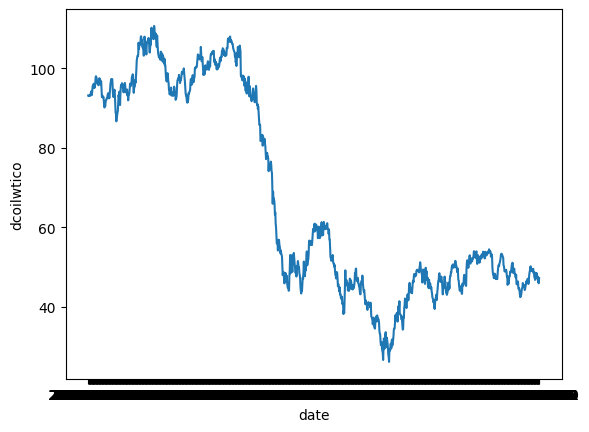

In [134]:
sns.lineplot(data=oil,x="date",y="dcoilwtico")

2. Holidays dataset

In [107]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [108]:
holidays.shape

(350, 6)

In [109]:
holidays['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [110]:
holidays[holidays['type'] == "Transfer"]

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


Additional means if 25th december is celebrated as chritmas and the some days before it all considered as the christmas holidays 
25th - holiday
other days - additional.

In [111]:
holidays[holidays['type'] == "Additional"]

,date,type,locale,locale_name,description,transferred
28,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
31,2012-12-21,Additional,National,Ecuador,Navidad-4,False
33,2012-12-22,Additional,National,Ecuador,Navidad-3,False
34,2012-12-23,Additional,National,Ecuador,Navidad-2,False
36,2012-12-24,Additional,National,Ecuador,Navidad-1,False
38,2012-12-26,Additional,National,Ecuador,Navidad+1,False
40,2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
53,2013-05-11,Additional,National,Ecuador,Dia de la Madre-1,False
64,2013-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
81,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


Bridge is like a if give that day as a holiday then it will be a long weekend or something 
example : 23th dec is sunday and 25th is christmas then 24th is the bridge between 2 holidays.

In [112]:
holidays[holidays['type'] == "Bridge"]

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


The type "work day" means it is actually a working day and if any public holiday comes on any weekend like sat or sun then one day is given as the observed day to celebrate that holiday.

In [113]:
holidays[holidays['type'] == "Work Day"]

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


"Event" refers to there is a some kind of situation occured or that there is an event is going on like 
on april 16th 2016 earth quake has occured , nov 11th 2018 was celebrated as cyber monday.

In [114]:
holidays[holidays['type'] == "Event"]

,date,type,locale,locale_name,description,transferred
55,2013-05-12,Event,National,Ecuador,Dia de la Madre,False
103,2014-05-11,Event,National,Ecuador,Dia de la Madre,False
106,2014-06-12,Event,National,Ecuador,Inauguracion Mundial de futbol Brasil,False
107,2014-06-15,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Suiza,False
108,2014-06-20,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Honduras,False
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False
114,2014-06-28,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
115,2014-06-29,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
116,2014-06-30,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
117,2014-07-01,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False


In [129]:
holidays.groupby(['type'])['locale'].count()

type
Additional     51
Bridge          5
Event          56
Holiday       221
Transfer       12
Work Day        5
Name: locale, dtype: int64

as the holiday data indicates there are no numerical variables where we want to describe and also there are no null values present in this dataset. we think that this dataset is clean.

3. stores

In [115]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [116]:
stores['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [117]:
x = stores['cluster'].unique()
x.sort()
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [118]:
stores['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [119]:
stores[['city','state']].drop_duplicates().sort_values('state')

,city,state
36,Cuenca,Azuay
18,Guaranda,Bolivar
13,Riobamba,Chimborazo
11,Latacunga,Cotopaxi
39,Machala,El Oro
42,Esmeraldas,Esmeraldas
34,Playas,Guayas
35,Libertad,Guayas
23,Guayaquil,Guayas
26,Daule,Guayas


In [120]:
stores[['city','state']].drop_duplicates().sort_values('state').shape

(22, 2)

overall the stores are present in 22 different cities across all the states

In [121]:
stores.groupby(['state'])['city'].unique()

state
Azuay                                                         [Cuenca]
Bolivar                                                     [Guaranda]
Chimborazo                                                  [Riobamba]
Cotopaxi                                                   [Latacunga]
El Oro                                                       [Machala]
Esmeraldas                                                [Esmeraldas]
Guayas                            [Guayaquil, Daule, Playas, Libertad]
Imbabura                                                      [Ibarra]
Loja                                                            [Loja]
Los Rios                                           [Babahoyo, Quevedo]
Manabi                                              [Manta, El Carmen]
Pastaza                                                         [Puyo]
Pichincha                                             [Quito, Cayambe]
Santa Elena                                                  [Salinas]


4. Train dataset

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [123]:
datadefination(train)

,column name,count,mean,std,min,25%,50%,75%,max,missing value count,null percentage
0,id,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0,0,0.0
1,store_nbr,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0,0,0.0
2,sales,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0,0,0.0
3,onpromotion,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0,0,0.0


In [124]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [125]:
train['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

5. Transactions dataset

In [130]:
datadefination(transactions)

,column name,count,mean,std,min,25%,50%,75%,max,missing value count,null percentage
0,store_nbr,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0,0,0.0
1,transactions,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0,0,0.0


In [131]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64